This is going to be a simple attempt at linear regression on a novel (to me) dataset.
I will be looking at fertilizer consumption in the US between 1960 and 2011 to train a model to predict future fertilizer consumption.

If it turns out to be kind of lame, I'll find some other metric to measure it against, such as population size?
I might do that anyway, not that I mention it.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

In [13]:
df = pd.read_excel('fertilizeruse.xls')[6:]

In [14]:
title = "U.S. consumption of plant nutrients"
# "T" for 'nutrient short tons' but I don't know what that means and fucked if I care about agriculture enough to find out!
# Also instead of nutrient directly, it's actually 'primary' nutrient content.
cols = [
    "Year (ending June 30)",
    "Nitrogen (N) 1000Ts",
    "Phosphate (P2O5) 1000Ts",
    "Potash (K2O) 1000Ts",
    "Total 1000Ts",
    "Nitrogen (%)",
    "Phosphate (%)",
    "Potash (%)"
]

AttributeError: 'DataFrame' object has no attribute 'header'

In [28]:
# Some cleanup - not sure if there's a better way, but at this point, whatever
df.drop('Unnamed: 1', axis=1, inplace=True)

KeyError: "['Unnamed: 1'] not found in axis"

In [30]:
df.drop("Unnamed: 6", axis=1, inplace=True)
df.columns = cols

In [43]:
df = df[:52][:]
# df.reindex()
df

,Year (ending June 30),Nitrogen (N) 1000Ts,Phosphate (P2O5) 1000Ts,Potash (K2O) 1000Ts,Total 1000Ts,Nitrogen (%),Phosphate (%),Potash (%)
0,1960,2738,2572.4,2153.3,7463.7,36.684218,34.46548,28.850302
1,1961,3030.8,2645.1,2168.5,7844.4,38.63648,33.719596,27.643924
2,1962,3370,2807,2270.5,8447.5,39.89346,33.228766,26.877774
3,1963,3929.1,3072.9,2503.4,9505.4,41.335451,32.32794,26.336609
4,1964,4352.8,3377.8,2729.7,10460.3,41.612573,32.291617,26.09581
5,1965,4638.5,3512.2,2834.5,10985.2,42.224994,31.972108,25.802898
6,1966,5326.3,3897.1,3221.2,12444.6,42.80009,31.315591,25.884319
7,1967,6027.1,4304.7,3641.8,13973.6,43.132049,30.805948,26.062003
8,1968,6787.6,4453.3,3792.6,15033.5,45.149832,29.62251,25.227658
9,1969,6957.6,4665.6,3891.6,15514.8,44.844922,30.071931,25.083146


Now that we're sufficiently cleaned up...
The simplest start (And it's 1am, so) would be to plot Year vs Total:

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


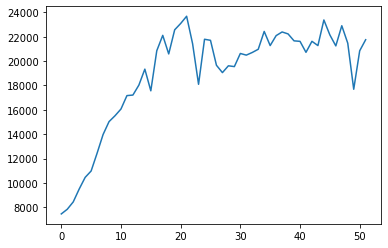

In [75]:
# data = df[['Year (ending June 30)', 'Total 1000Ts']]
# plt.plot(data)
x_train = df['Year (ending June 30)']
y_train = df['Total 1000Ts']
# plt.plot(x_train, y_train)
x_train2 = pd.Series([x - 1960 for x in x_train]) # Let's just...even that out.
plt.plot(x_train2, y_train)

Well, that's clearly not linear.

In [64]:
def compute_cost(x, y, w, b):
    """
    Compute the cost of the model of x, y using weights w, b
    Args:
      x (ndarray): Input data
      y (ndarray): Desired output
      w, b (scalar): Weights of the cost function
    Returns:
      The cost, or mean squared error, of using the parameters w, b on the model
    """
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost += ((f_wb - y[i]) ** 2)
    
    return cost / (2 * m)

In [87]:
compute_cost(x_train2, y_train, 0, 0) # Oof, bad guess!

0.0

In [91]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dw, db = 0, 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        err = f_wb - y[i]
        dw_i = err * x[i]
        db_i = err
        dw += dw_i
        db += db_i
    
    dw /= m
    db /= m

    return dw, db

In [95]:
def gradient_descent(x, y, w=0, b=0, alpha=0.01, iters=1000, cost_function=compute_cost, gradient_function=compute_gradient):
    w = copy.deepcopy(w)
    J_hist = []
    p_hist = []
    
    for i in range(iters): # or step size suff. small?
        dw, db = gradient_function(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        J_hist.append(cost_function(x, y, w, b))
        p_hist.append((w, b))
        if i % math.ceil(iters / 10) == 0:
            print(f"Iter {i:4}: Cost {J_hist[-1]:0.2e} ",
                 f"dw: {dw: 0.3e}, db: {db: 0.3e} ",
                 f"w: {w: 0.3e}, b:{b: 0.5e}")
    
    return w, b, J_hist, p_hist

In [97]:
w, b, J_hist, p_hist = gradient_descent(x_train2, y_train)

Iter    0: Cost 9.70e+09  dw: -5.300e+05, db: -1.889e+04  w:  5.300e+03, b: 1.88906e+02
Iter  100: Cost 9.66e+187  dw: -5.299e+94, db: -1.544e+93  w:  4.694e+92, b: 1.36755e+91
Iter  200: Cost inf  dw: -5.296e+183, db: -1.543e+182  w:  4.691e+181, b: 1.36682e+180
Iter  300: Cost inf  dw: -5.293e+272, db: -1.542e+271  w:  4.689e+270, b: 1.36608e+269
Iter  400: Cost nan  dw:  nan, db:  nan  w:  nan, b: nan
Iter  500: Cost nan  dw:  nan, db:  nan  w:  nan, b: nan
Iter  600: Cost nan  dw:  nan, db:  nan  w:  nan, b: nan
Iter  700: Cost nan  dw:  nan, db:  nan  w:  nan, b: nan


/tmp/ipykernel_80262/400054266.py:16: RuntimeWarning: overflow encountered in double_scalars
  cost += ((f_wb - y[i]) ** 2)
/tmp/ipykernel_80262/1981431981.py:10: RuntimeWarning: overflow encountered in double_scalars
  dw += dw_i
/tmp/ipykernel_80262/400054266.py:15: RuntimeWarning: invalid value encountered in double_scalars
  f_wb = w * x[i] + b
/tmp/ipykernel_80262/1981431981.py:6: RuntimeWarning: invalid value encountered in double_scalars
  f_wb = w * x[i] + b


Iter  800: Cost nan  dw:  nan, db:  nan  w:  nan, b: nan
Iter  900: Cost nan  dw:  nan, db:  nan  w:  nan, b: nan


Iter    0: Cost 1.61e+02  dw: -5.300e+02, db: -1.889e+01  w:  5.300e-02, b: 1.88906e-03
Iter  500: Cost 2.65e+01  dw:  9.909e-02, db: -3.401e+00  w:  6.000e-01, b: 1.89118e-01
Iter 1000: Cost 2.60e+01  dw:  9.782e-02, db: -3.358e+00  w:  5.951e-01, b: 3.58078e-01
Iter 1500: Cost 2.54e+01  dw:  9.657e-02, db: -3.315e+00  w:  5.902e-01, b: 5.24880e-01
Iter 2000: Cost 2.49e+01  dw:  9.534e-02, db: -3.272e+00  w:  5.854e-01, b: 6.89553e-01
Iter 2500: Cost 2.43e+01  dw:  9.412e-02, db: -3.231e+00  w:  5.807e-01, b: 8.52122e-01
Iter 3000: Cost 2.38e+01  dw:  9.292e-02, db: -3.189e+00  w:  5.760e-01, b: 1.01261e+00
Iter 3500: Cost 2.33e+01  dw:  9.173e-02, db: -3.149e+00  w:  5.714e-01, b: 1.17106e+00
Iter 4000: Cost 2.28e+01  dw:  9.056e-02, db: -3.108e+00  w:  5.669e-01, b: 1.32748e+00
Iter 4500: Cost 2.23e+01  dw:  8.941e-02, db: -3.069e+00  w:  5.624e-01, b: 1.48190e+00


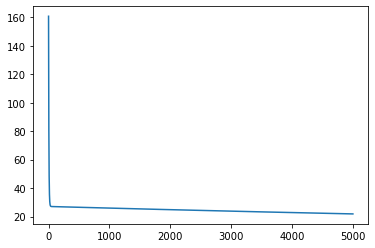

Final w: 5.579e-01, b: 1.634e+00
Year	Prediction	True
 2015	 32319.870467658595	22021


In [149]:
w, b, J_hist, p_hist = gradient_descent(x_train2, y_train2, alpha=0.0001, iters=5000)
plt.plot(range(len(J_hist)), J_hist)
plt.show()
print(f"Final w:{w: 0.3e}, b:{b: 0.3e}")
print(f"Year\tPrediction\tTrue\n",
     f"2015\t{1000 * (55 * w + b): 4}\t22021")

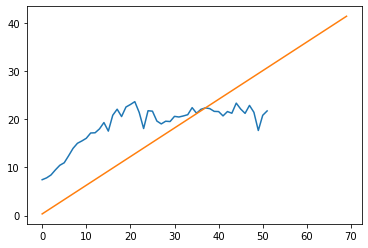

In [142]:
def f(x, w, b):
    return w * x + b

def graph(formula, x_range, w, b):
    x = pd.Series([_ for _ in range(x_range)])
    y = formula(x, w, b)
    plt.plot(x, y)
    plt.show()
    
plt.plot(x_train2, y_train2)
graph(f, 70, w, b)

Hmm, seems like a much lower $w$ would result in a better fit, looking at that last plot.
The cruddy prediction seems to confirm that.
Note a very low alpha was needed, else the error skyrocketed.

In [150]:
compute_cost(x_train2, y_train2, 0, 20)

9.81485260894231

Am I a machine learning model now?

Yeah.